In [24]:
import mglearn

from IPython.display import display

import numpy as np

import matplotlib.pyplot as plt

from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_moons, load_breast_cancer
from sklearn.model_selection import train_test_split

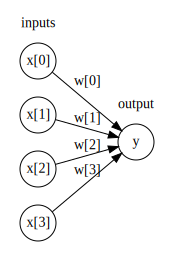

In [4]:
display(mglearn.plots.plot_logistic_regression_graph())

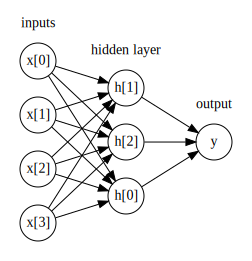

In [3]:
display(mglearn.plots.plot_single_hidden_layer_graph())

Text(0, 0.5, 'relu(x), tanh(x)')

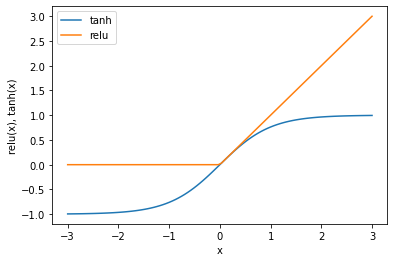

In [7]:
line = np.linspace(-3, 3, 100)

plt.plot(line, np.tanh(line,), label='tanh')
plt.plot(line, np.maximum(line, 0), label='relu')

plt.legend(loc='best')

plt.xlabel('x')
plt.ylabel('relu(x), tanh(x)')

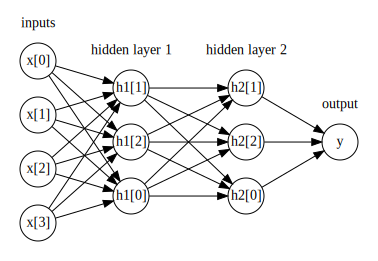

In [38]:
display(mglearn.plots.plot_two_hidden_layer_graph())

In [13]:
X, y = make_moons(n_samples=100, noise=.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    stratify=y,
    random_state=42
)

In [15]:
mlp = MLPClassifier(solver='lbfgs', random_state=0)
mlp.fit(X_train, y_train)

print(f'Train score: {mlp.score(X_train, y_train)}')
print(f'Test score: {mlp.score(X_test, y_test)}')

Train score: 1.0
Test score: 0.88


Text(0, 0.5, 'Feature 1')

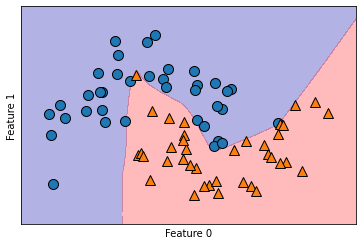

In [16]:
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)

plt.xlabel('Feature 0')
plt.ylabel('Feature 1')

Text(0, 0.5, 'Feature 1')

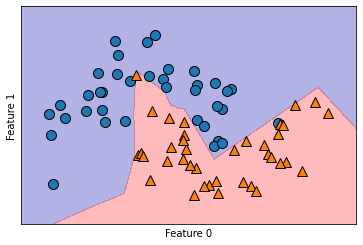

In [18]:
mlp = MLPClassifier(
    solver='lbfgs',
    random_state=0,
    hidden_layer_sizes=[10, 10]
)
mlp.fit(X_train, y_train)

mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)

plt.xlabel('Feature 0')
plt.ylabel('Feature 1')

/usr/local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Text(0, 0.5, 'Feature 1')

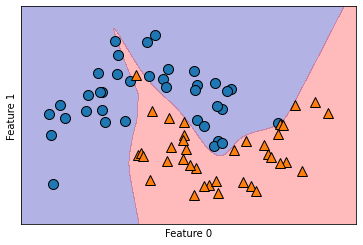

In [19]:
mlp = MLPClassifier(
    solver='lbfgs',
    activation='tanh',
    random_state=0,
    hidden_layer_sizes=[10, 10]
)
mlp.fit(X_train, y_train)

mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)

plt.xlabel('Feature 0')
plt.ylabel('Feature 1')

/usr/local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


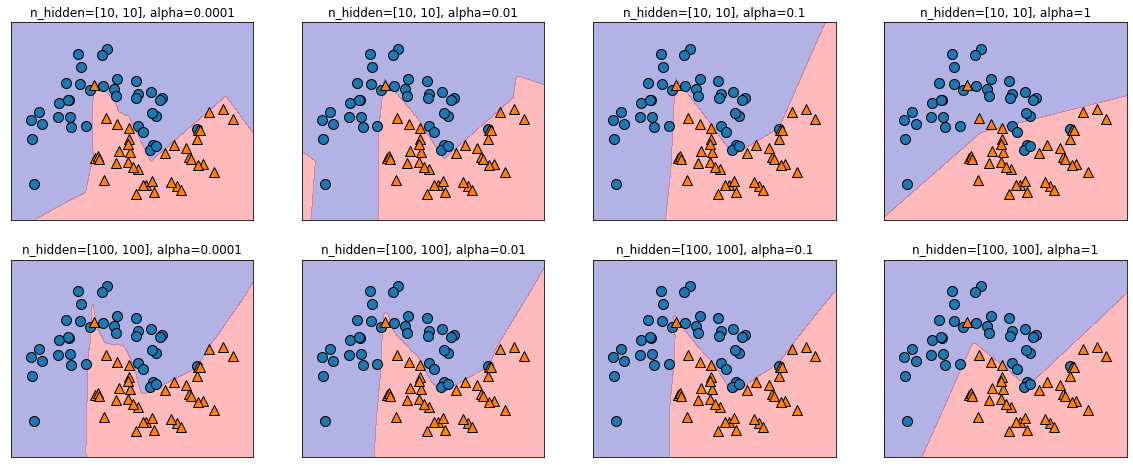

In [21]:
fig, axes = plt.subplots(2, 4, figsize=(20, 8))

for axx, n_hidden_nodes in zip(axes, [10, 100]):
    for ax, alpha in zip(axx, [0.0001, 0.01, 0.1, 1]):
        mlp = MLPClassifier(
            solver='lbfgs',
            random_state=0,
            hidden_layer_sizes=[n_hidden_nodes, n_hidden_nodes],
            alpha=alpha
        )
        mlp.fit(X_train, y_train)
        
        mglearn.plots.plot_2d_separator(
            mlp, X_train,
            fill=True,
            alpha=.3,
            ax=ax
        )
        mglearn.discrete_scatter(
            X_train[:, 0],
            X_train[:, 1],
            y_train,
            ax=ax
        )
        
        ax.set_title(f'n_hidden=[{n_hidden_nodes}, {n_hidden_nodes}], alpha={alpha}')

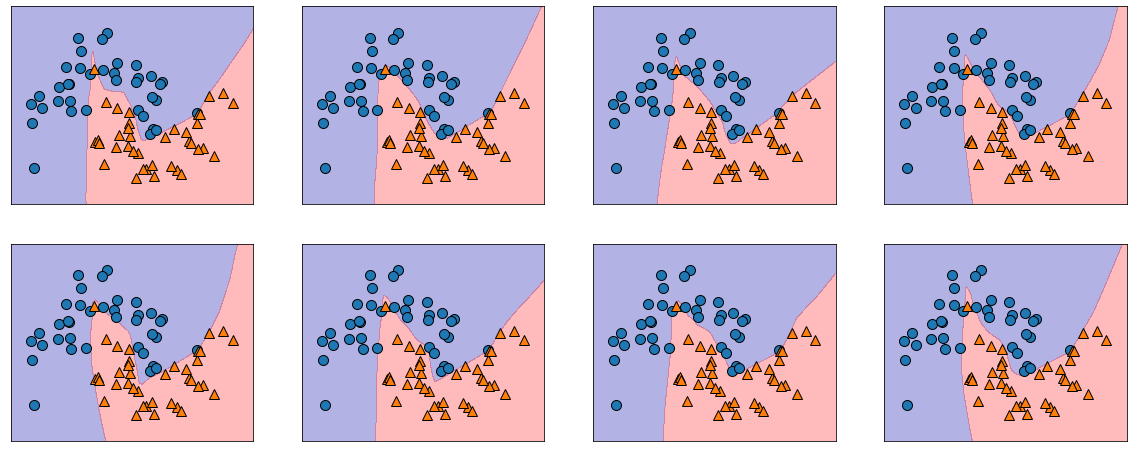

In [23]:
fig, axes = plt.subplots(2, 4, figsize=(20, 8))

for i, ax in enumerate(axes.ravel()):
    mlp = MLPClassifier(
        solver='lbfgs',
        random_state=i,
        hidden_layer_sizes=[100, 100]
    )
    mlp.fit(X_train, y_train)
    
    mglearn.plots.plot_2d_separator(
        mlp, X_train,
        fill=True,
        alpha=.3,
        ax=ax
    )
    mglearn.discrete_scatter(
        X_train[:, 0],
        X_train[:, 1],
        y_train,
        ax=ax
    )

In [26]:
cancer = load_breast_cancer()

print(f'Max features: \n{cancer.data.max(axis=0)}')

Max features: 
[2.811e+01 3.928e+01 1.885e+02 2.501e+03 1.634e-01 3.454e-01 4.268e-01
 2.012e-01 3.040e-01 9.744e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 3.113e-02 1.354e-01 3.960e-01 5.279e-02 7.895e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 1.058e+00 1.252e+00 2.910e-01
 6.638e-01 2.075e-01]


In [33]:
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data,
    cancer.target,
    random_state=0
)

mlp = MLPClassifier(random_state=42)
mlp.fit(X_train, y_train)

print(f'Train score: {mlp.score(X_train, y_train)}')
print(f'Test score: {mlp.score(X_test, y_test)}')

Train score: 0.9389671361502347
Test score: 0.916083916083916


In [34]:
train_mean = X_train.mean(axis=0)
train_std = X_train.std(axis=0)

scaled_train = (X_train - train_mean) / train_std
scaled_test = (X_test -  train_mean) / train_std

mlp = MLPClassifier(random_state=0)
mlp.fit(scaled_train, y_train)

print(f'Train score: {mlp.score(scaled_train, y_train)}')
print(f'Train score: {mlp.score(scaled_test, y_test)}')

Train score: 0.9906103286384976
Train score: 0.965034965034965


/usr/local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [35]:
mlp = MLPClassifier(max_iter=1000, random_state=0)
mlp.fit(scaled_train, y_train)

print(f'Train score: {mlp.score(scaled_train, y_train)}')
print(f'Train score: {mlp.score(scaled_test, y_test)}')

Train score: 1.0
Train score: 0.972027972027972


In [36]:
mlp = MLPClassifier(max_iter=1000, alpha=1, random_state=0)
mlp.fit(scaled_train, y_train)

print(f'Train score: {mlp.score(scaled_train, y_train)}')
print(f'Train score: {mlp.score(scaled_test, y_test)}')

Train score: 0.9882629107981221
Train score: 0.972027972027972


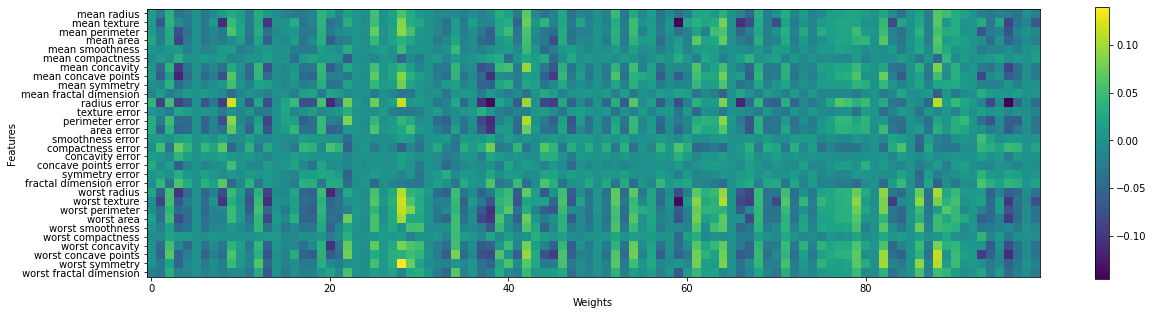

In [37]:
plt.figure(figsize=(20, 5))
plt.imshow(mlp.coefs_[0], interpolation='none', cmap='viridis')
plt.yticks(range(30), cancer.feature_names)

plt.xlabel('Weights')
plt.ylabel('Features')

plt.colorbar()